In [2]:
library("ggpubr")
library("see")
library("tidyverse")
library(parallel)
library(lmerTest)
library(lme4)
suppressPackageStartupMessages(library(performance))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(ggrepel))
library(RColorBrewer)
library(viridis)

Loading required package: ggplot2

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step


Loading required package: viridisLite



In [3]:
Olnik<-read.csv('Olink.csv')

In [4]:
meta<-read.csv('/home/jupyter/BRI_Analysis/scRNA/hise_meta_data_2024-01-09.csv')
meta<-meta %>% filter(sample.visitName=='Flu Year 1 Day 0')

In [5]:
CMV=read.csv("/home//jupyter/BRI_Analysis/scRNA/CMV_20220718.csv") 
meta<-left_join(meta,CMV,by = c("subject.subjectGuid"))

In [6]:
rownames(meta)<-meta$sample.sampleKitGuid

In [7]:
n_distinct(meta$sample.sampleKitGuid)


[1] 92

In [8]:
Olnik<-Olnik %>% filter(sample.sampleKitGuid %in% unique(meta$sample.sampleKitGuid))

In [9]:
Olnik<-left_join(Olnik,meta, by = c("sample.sampleKitGuid"))

In [10]:
n_distinct(Olnik$sample.sampleKitGuid)


[1] 92

In [11]:
Olnik$subject.biologicalSex

X,sample.sampleKitGuid,NPX_bridged,Assay,batch,X.x,lastUpdated,sample.id,sample.bridgingControl,sample.visitName,⋯,subject.birthYear,subject.ethnicity,subject.partnerCode,subject.race,subject.subjectGuid,cohort.cohortGuid,sample.diseaseStatesRecordedAtVisit,pbmc_sample_id,X.y,CMV.IgG.Serology.Result.Interpretation
<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<int>,<chr>
855803,KT00592,3.1816,GYS1,Batch2_Bridged,285,2024-01-09T19:21:56.416Z,896a2e1c-f9de-4781-8d33-4ed6d6751112,false,Flu Year 1 Day 0,⋯,1992,Hispanic or Latino origin,BR,Caucasian,BR1052,BR1,NA,PB00592-01,41,Negative
855828,KT00383,2.9426,GYS1,Batch2_Bridged,178,2024-01-09T19:21:56.416Z,66ab3cca-4194-4b14-9f95-709d5cc2f4c0,false,Flu Year 1 Day 0,⋯,1965,Non-Hispanic origin,BR,Caucasian,BR2039,BR2,NA,PB00383-01,85,Negative
855830,KT00387,2.7043,GYS1,Batch2_Bridged,182,2024-01-09T19:21:56.416Z,d2dded9d-08a1-432f-a1f1-8b4691c10cce,false,Flu Year 1 Day 0,⋯,1962,Non-Hispanic origin,BR,Caucasian,BR2035,BR2,NA,PB00387-01,82,Positive
855844,KT00541,3.5778,GYS1,Batch2_Bridged,236,2024-01-09T19:21:56.416Z,3913b730-208c-4670-9715-101f20b1134c,false,Flu Year 1 Day 0,⋯,1959,Non-Hispanic origin,BR,Caucasian,BR2043,BR2,NA,PB00541-01,88,Positive
855846,KT00523,3.2138,GYS1,Batch2_Bridged,218,2024-01-09T19:21:56.416Z,dcc4d7b6-eec3-433b-abe5-c94837617783,false,Flu Year 1 Day 0,⋯,1963,Non-Hispanic origin,BR,Caucasian,BR2048,BR2,NA,PB00523-01,84,Positive
855847,KT00532,3.8977,GYS1,Batch2_Bridged,227,2024-01-09T19:21:56.416Z,daa136f9-4e2f-42d3-a5b3-8d0b5d859aea,false,Flu Year 1 Day 0,⋯,1985,Non-Hispanic origin,BR,Asian,BR1048,BR1,NA,PB00532-01,33,Positive
855849,KT00625,4.9326,GYS1,Batch2_Bridged,317,2024-01-09T19:21:56.416Z,1ab5c695-6910-425f-8169-f324745edbeb,false,Flu Year 1 Day 0,⋯,1956,Non-Hispanic origin,BR,Caucasian,BR2053,BR2,NA,PB00625-02,91,Positive
855891,KT00592,1.0062,THPO,Batch2_Bridged,285,2024-01-09T19:21:56.416Z,896a2e1c-f9de-4781-8d33-4ed6d6751112,false,Flu Year 1 Day 0,⋯,1992,Hispanic or Latino origin,BR,Caucasian,BR1052,BR1,NA,PB00592-01,41,Negative
855916,KT00383,0.9807,THPO,Batch2_Bridged,178,2024-01-09T19:21:56.416Z,66ab3cca-4194-4b14-9f95-709d5cc2f4c0,false,Flu Year 1 Day 0,⋯,1965,Non-Hispanic origin,BR,Caucasian,BR2039,BR2,NA,PB00383-01,85,Negative


In [12]:
res_list<-mclapply(unique(Olnik$Assay),function(x){
Olnik_sub<-Olnik  %>% filter(sample.visitName=='Flu Year 1 Day 0',Assay==x)
res<-lm(NPX_bridged ~ cohort.cohortGuid+CMV.IgG.Serology.Result.Interpretation+subject.biologicalSex, data=Olnik_sub)
res<-as.data.frame(summary(res)$coefficients)[2:3,]
res$factor<-c('Age','CMV')  
res$Assay<-x
res$Log2FC_Age<-Olnik_sub %>%
  dplyr::group_by(Assay, cohort.cohortGuid) %>%
  dplyr::summarise(Mean_Expression = mean(NPX_bridged, na.rm = TRUE)) %>%
  spread(cohort.cohortGuid, Mean_Expression) %>%
  mutate(Log2FC = log2(BR2 / BR1))%>% ungroup() %>% select(Log2FC) %>% pull()
res$diff<-Olnik_sub %>%
  dplyr::group_by(Assay, cohort.cohortGuid) %>%
  dplyr::summarise(Mean_Expression = mean(NPX_bridged, na.rm = TRUE)) %>%
  spread(cohort.cohortGuid, Mean_Expression) %>%
  mutate(diff = BR2- BR1)%>% select(diff) %>% pull()    
return(res)
},mc.cores=60)

In [13]:
res_all<-do.call(rbind,res_list )

In [14]:
res_all_age<-res_all %>% filter(factor=='Age')
res_all_cmv<-res_all %>% filter(factor=='CMV')

In [15]:
res_all_age$padj<-p.adjust(res_all_age$`Pr(>|t|)`)
res_all_cmv$padj<-p.adjust(res_all_cmv$`Pr(>|t|)`)

In [16]:
data <- res_all_age%>% mutate(Expression = case_when(diff >=0.1 & padj <= 0.05 ~ "Up-regulated",
                                                     diff <= -0.1 & padj <= 0.05 ~ "Down-regulated",
                                                     TRUE ~ "Unchanged"))

In [17]:
top <- 30
top_genes <- bind_rows(
  data %>% 
    filter(Expression == 'Up-regulated') %>% 
    arrange(padj, desc(abs(diff))) %>% 
    head(top),
  data %>% 
    filter(Expression == 'Down-regulated') %>% 
    arrange(padj, desc(abs(diff))) %>% 
    head(top))

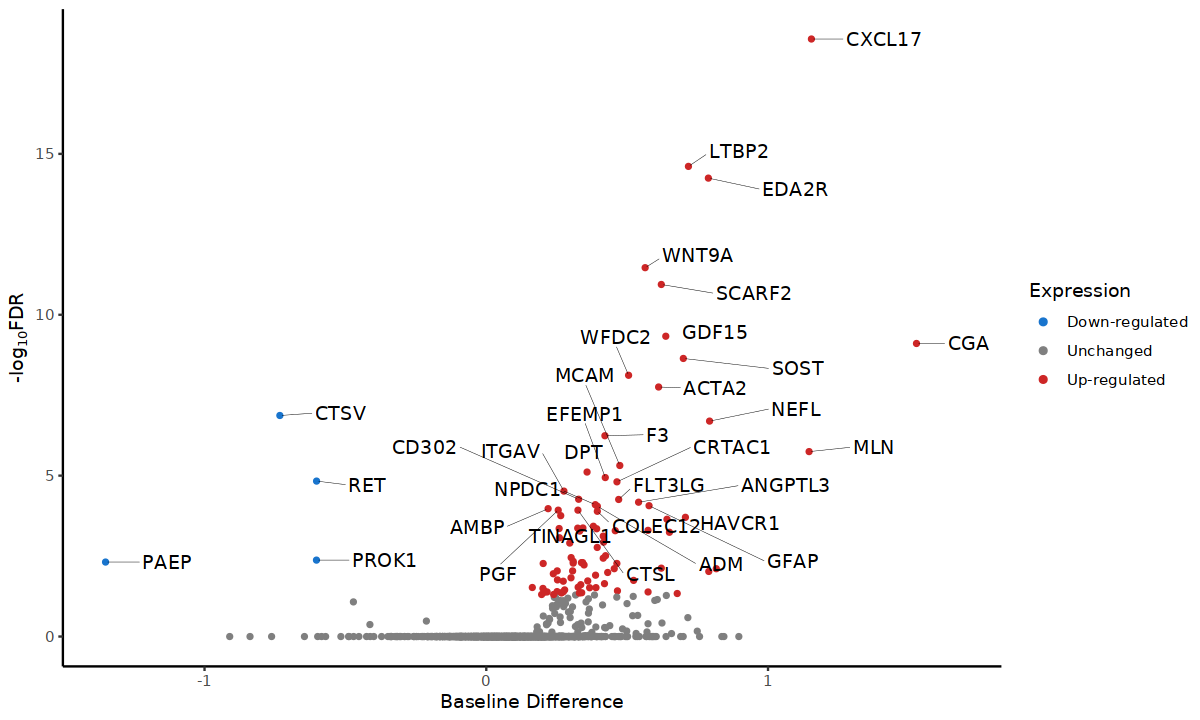

In [20]:
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(data, aes(diff, -log(padj,10))) +
  geom_point(aes(color = Expression), size = 1) +
  xlab(expression("Baseline Difference")) + 
  ylab(expression("-log"[10]*"FDR")) +
  scale_color_manual(values = c("Down-regulated"="dodgerblue3", "Unchanged"="gray50", "Up-regulated"="firebrick3")) +
  guides(colour = guide_legend(override.aes = list(size=1.5))) +
  geom_text_repel(data = top_genes,box.padding = 0.5,force= 0.5,max.overlaps=50,
    nudge_x           = 0.15,
    hjust             = 0.1,
    segment.size      = 0.1,
                   mapping = aes(diff, -log(padj,10), label = Assay),
                   size = 4)+theme_classic()


In [26]:
data$Log2FC_Age<-NULL

In [27]:
write.csv(data %>% arrange(padj),'Olink_Age.csv')

# Visualization

### Age

In [21]:
wide_format<-Olnik %>% filter(sample.visitName=='Flu Year 1 Day 0')%>% select(Assay,NPX_bridged,sample.sampleKitGuid)%>% 
  spread(key = sample.sampleKitGuid, value = NPX_bridged)

In [22]:
rownames(wide_format)<-wide_format$Assay

In [23]:
wide_format<-wide_format[-1]

In [24]:
gene_list<-res_all_age%>%arrange(padj) %>% filter(padj<0.05,abs(diff)>0.1) %>% select(Assay) %>% pull()

In [25]:
annotation_data<-meta[colnames(wide_format),]

In [26]:
annotation_data<-annotation_data %>% arrange(cohort.cohortGuid)

In [27]:
rownames(annotation_data)<-annotation_data$sample.sampleKitGuid

In [28]:
cols <- colorRampPalette(brewer.pal(9, "RdPu"))

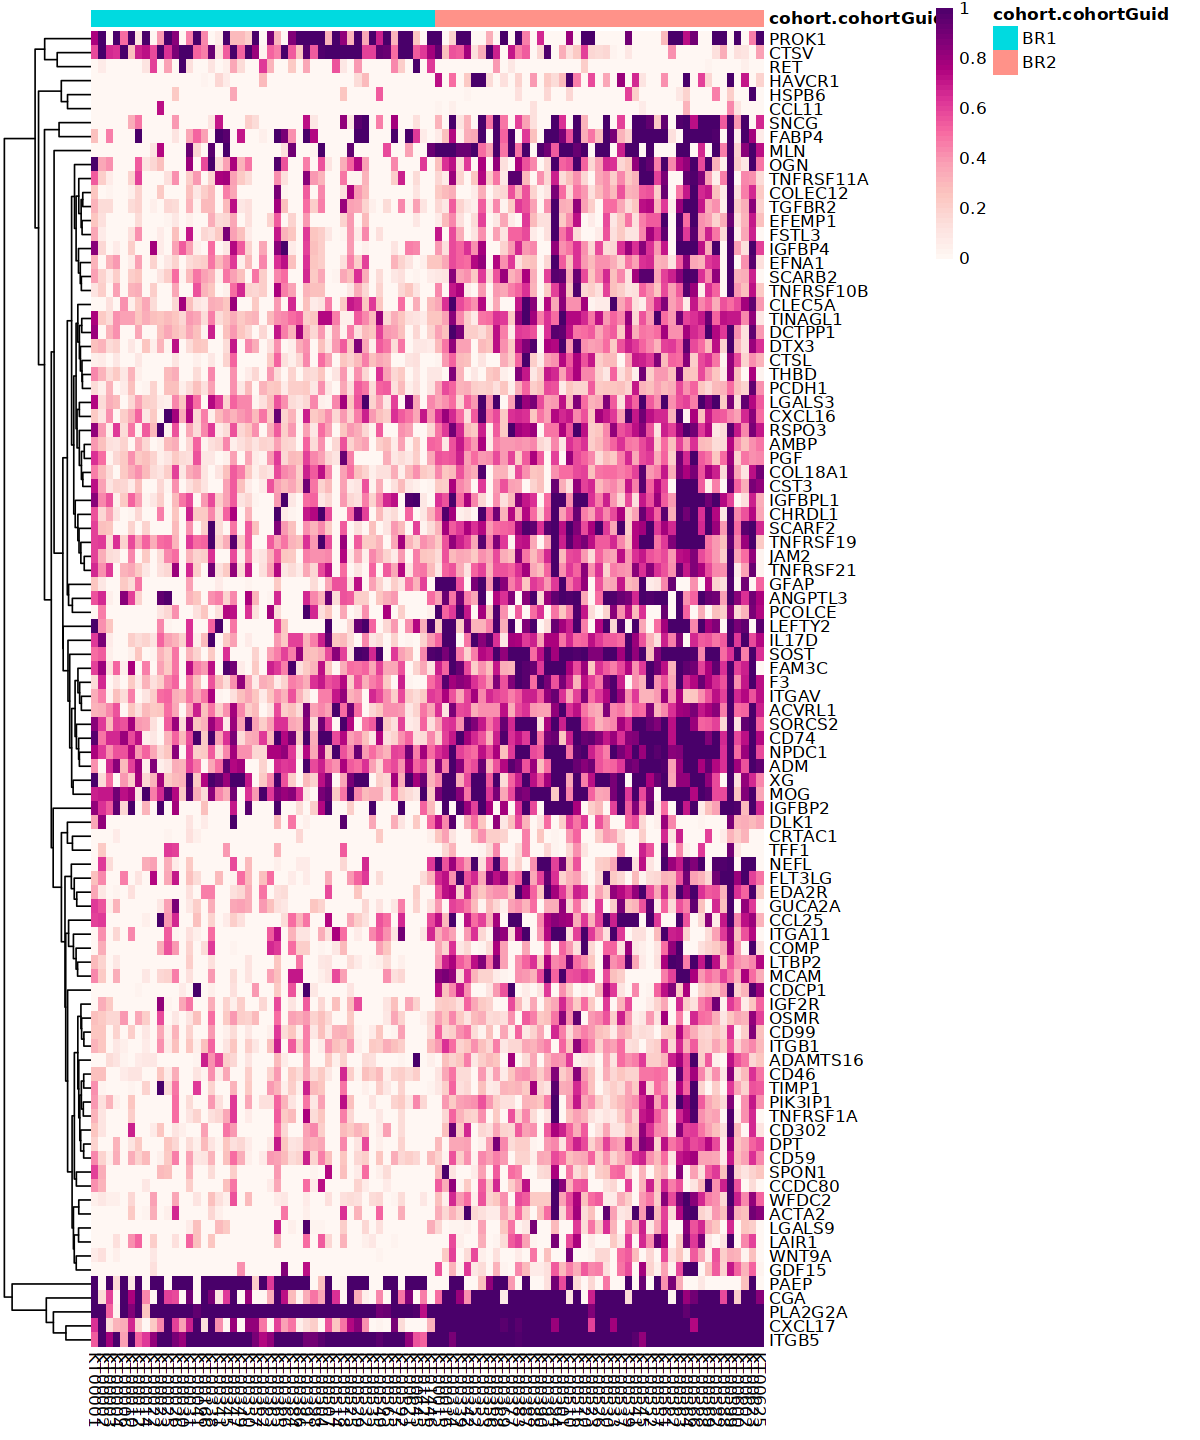

In [29]:
options(repr.plot.width = 10, repr.plot.height = 12)

pheatmap(wide_format[gene_list,annotation_data$sample.sampleKitGuid],breaks=seq(0, 1, length.out=50), 
         cluster_cols = FALSE,color=cols(50),
         annotation_col = annotation_data['cohort.cohortGuid'])